Using device: cpu


100%|██████████| 90/90 [2:29:52<00:00, 99.92s/it]   


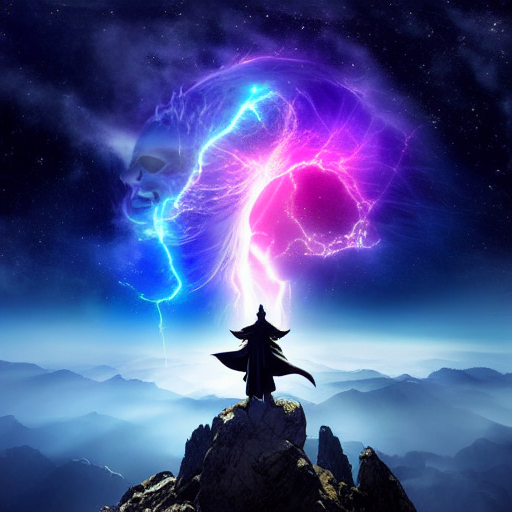

In [1]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video

DEVICE = "cpu"
ALLOW_CUDA = False
if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

prompt = "Epic anime artwork of a wizard atop a mountain at night casting a cosmic spell into the dark sky made out of colorful energy, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = "low detail, blurry, non-cinematic, low resolution, poorly lit, out of focus, low quality"  # negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE
input_image = None
# Comment to disable image to image
image_path = "../images/i2.png"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER
sampler = "ddpm"
num_inference_steps = 100
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)



100%|██████████| 35/35 [37:17<00:00, 63.93s/it]


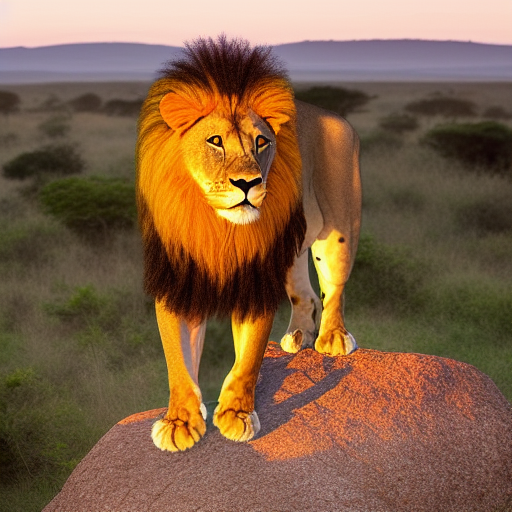

In [2]:
prompt = "A majestic lion standing on a rocky outcrop in the African savannah at sunset, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = "low detail, blurry, non-cinematic, low resolution, poorly lit, out of focus, low quality"  
do_cfg = True
cfg_scale = 9  # min: 1, max: 14
input_image = None
strength = 0.9

## SAMPLER
sampler = "ddpm"
num_inference_steps = 35
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

In [ ]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video

DEVICE = "cpu"
ALLOW_CUDA = False
if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

prompt = "Epic anime artwork of a wizard atop a mountain at night casting a cosmic spell into the dark sky made out of colorful energy, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = "low detail, blurry, non-cinematic, low resolution, poorly lit, out of focus, low quality"  # negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE
input_image = None
# Comment to disable image to image
image_path = "../images/output.png"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.5

## SAMPLER
sampler = "ddpm"
num_inference_steps = 6
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
image = Image.fromarray(output_image)

pipe = StableVideoDiffusionPipeline.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16, variant="fp16"
)
# #  Uncomment if GPU is available
# pipe.enable_model_cpu_offload()
# pipe.unet.enable_forward_chunking()

# Load the conditioning image
image = image.resize((1024, 576))

generator = torch.manual_seed(42)
frames = pipe(image, decode_chunk_size=2, generator=generator, num_frames=21).frames[0]

video_path = export_to_video(frames, "generated.mp4", fps=7)
print(f"Video is at {video_path}")